# Семинар наставника, АБД

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 4. Библиотеки Matplotlib, Seaborn

Задание выполнил:

    Семенюк Александр Александрович

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 0.5 или 1 балл (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 10 баллов.

## Раздел 1. Визуализации в датасете кредитного скоринга

### О задании

Вы будете работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно исследовать с помощью средств визуализации.

*Описание данных*:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить – для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GERMAN_CREDIT = 'https://github.com/evgpat/datasets/raw/refs/heads/main/german_credit.csv'

### Задание 1 (0.5 балла)

Используя `numpy` и `matplotlib`, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ на интервале от $-\pi$ до $\pi$, используя 100 точек. Добавьте легенду и сетку.. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

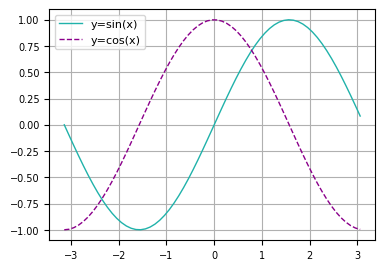

In [3]:
# ваш код здесь

x = np.arange(-np.pi, np.pi, 0.1)
y1, y2 = np.sin(x), np.cos(x)
plt.figure(figsize=(4.2,3))
plt.plot(x, y1, label='y=sin(x)', color='lightseagreen', linewidth=1)
plt.plot(x, y2, label='y=cos(x)', color='darkmagenta', linestyle='--', linewidth=1)

# Настройка шрифтов
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.grid()
plt.yticks(np.arange(-1, 1.1, 0.25))
plt.legend(loc='upper left', fontsize=8)
plt.show()

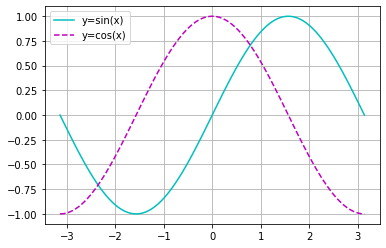

In [ ]:
# то что должно получиться

### Задание 2 (0.5 балла)

Прочитайте средствами pandas файл с данными кредитного скоринга. Рассмотрите сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

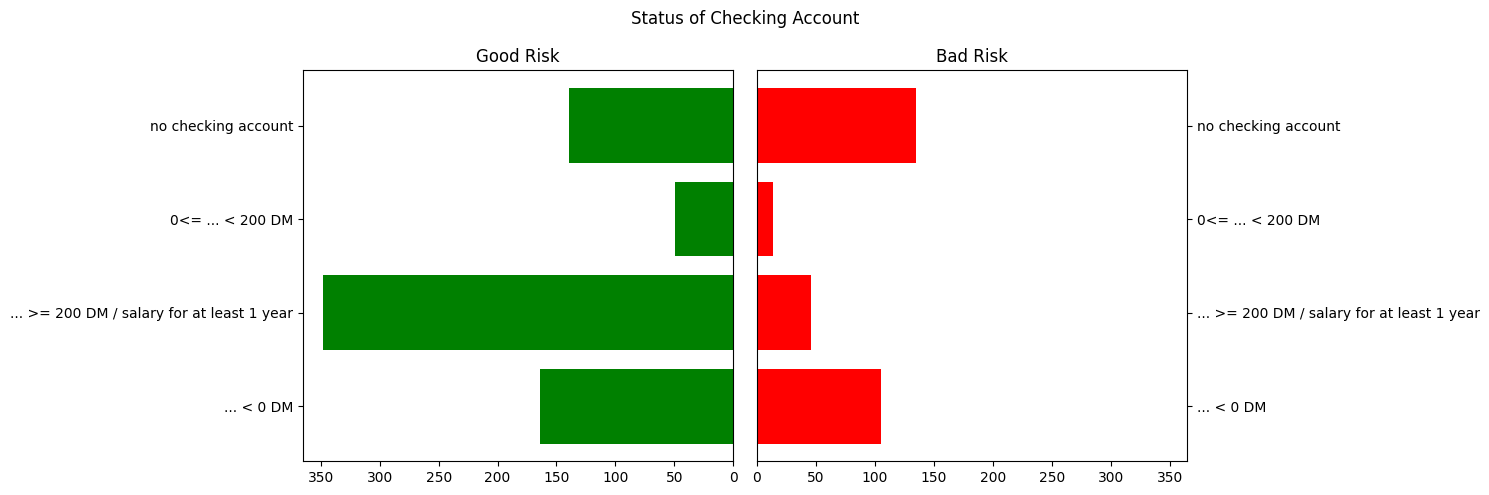

In [4]:
# ваш код здесь

df = pd.read_csv(GERMAN_CREDIT)
# Привожу к удобному виду датафрейм
gp_df = df.groupby(['status', 'credit_risk']).size().unstack()

# Получаю fig и ax для более тонкой настройки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.barh(gp_df.index, gp_df['good'], color='green')
ax2.barh(gp_df.index, gp_df['bad'], color='red')
ax1.invert_xaxis() # Инверт оси для первого графика
ax1.set_title('Good Risk')
ax2.set_title('Bad Risk')

# Переношу метки и засечки вправо
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

plt.suptitle('Status of Checking Account') # Общее название, plt.title() почему-то меняет для правого графика
plt.xlim(0, 365) # Ставлю лимит по умолчанию , чтоб в пиксель прям как в примере, ыхыхы
plt.grid(visible=False)
plt.tight_layout()
plt.show()

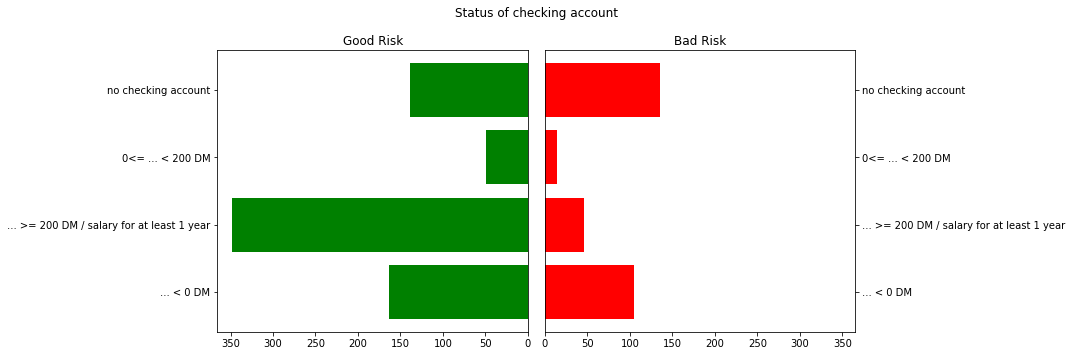

In [ ]:
# то что должно получиться

### Задание 3  (0.5 балла)

In [47]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

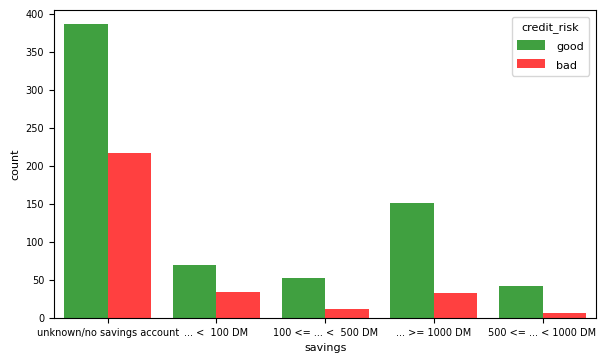

Выводы: восприятие - субъективно, однако мне визуально приятнее вариант выше с pyplot, 
написание кода с pyplot ужасно, если б можно было материться...


In [5]:
# ваш код здесь

plt.figure(figsize=(7,4))

# Куча параметров, но хоть кода не так много, как с pyplot
ax = sns.histplot(
    data=df, 
    x='savings', 
    hue='credit_risk', 
    multiple='dodge', 
    shrink=0.8, 
    edgecolor=None,
    palette={'good': 'green', 'bad': 'red'}, 
)
# Выше в palette задаю цвет, пробовал палитры, hex, все бестолку. Оставьте коммент, почему цвет другой пжлст

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('savings', fontsize=8)
plt.ylabel('count', fontsize=8)

# Хитрушка, чтоб достать текст из легенды
plt.setp(ax.get_legend().get_texts(), fontsize='8')
plt.setp(ax.get_legend().get_title(), fontsize='8')

plt.margins(x=0.02) # Срубаю отступы, чтоб было как на примере
plt.show()

print("Выводы: восприятие - субъективно, однако мне визуально приятнее вариант выше с pyplot, \nнаписание кода с pyplot ужасно, если б можно было материться...")

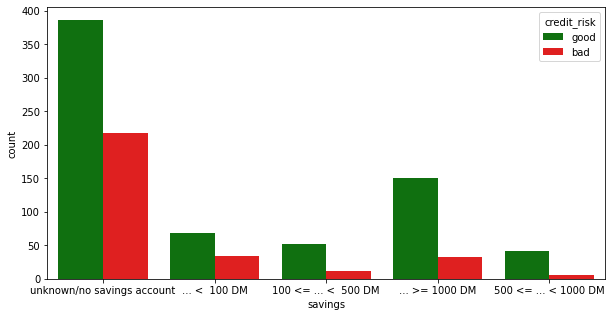

In [ ]:
# то что должно получиться

### Задание 4  (0.5 балла)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

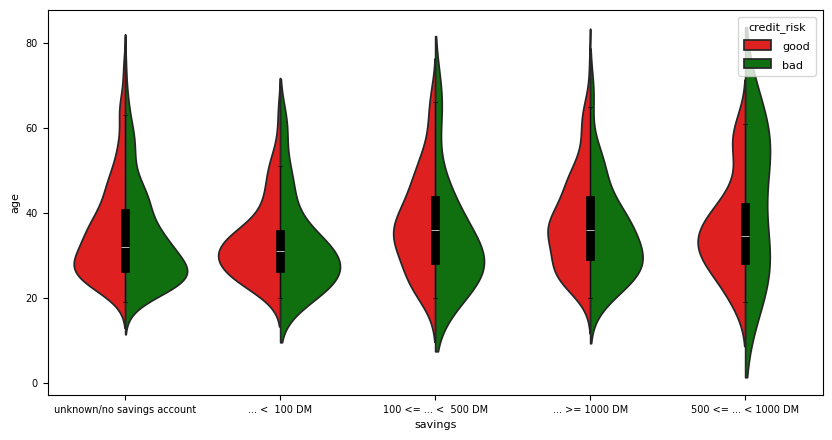

In [6]:
# ваш код здесь

"""
В общем, я потратил безумное количество времени, чтобы попытаться убрать 'задвоившийся' boxplot при активном inner='box',
но все тщетно. Поэтому я просто отрисую его отдельно поверх. Проблема возникает из-за того, что violinplt отрисовывает
boxplot для положительных и негативных случаев в отдельности. Видимо мне не удалось найти нужную группировку.
"""
plt.figure(figsize=(10,5))
ax = sns.violinplot(
    x='savings', 
    y='age', 
    hue='credit_risk', 
    data=df, 
    split=True, 
    inner=None,
    palette=['red', 'green']
)
sns.boxplot(
    x='savings', 
    y='age', 
    data=df, 
    color='black', 
    width=0.05, 
    fliersize=0, 
    linewidth=0.5,
    medianprops={'color': 'white'}
)
plt.legend(title='credit_risk', loc='upper right')

# Настройки шрифта
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('savings', fontsize=8)
plt.ylabel('age', fontsize=8)

# Хитрушка, чтоб достать текст из легенды
plt.setp(ax.get_legend().get_texts(), fontsize='8')
plt.setp(ax.get_legend().get_title(), fontsize='8')

plt.show()

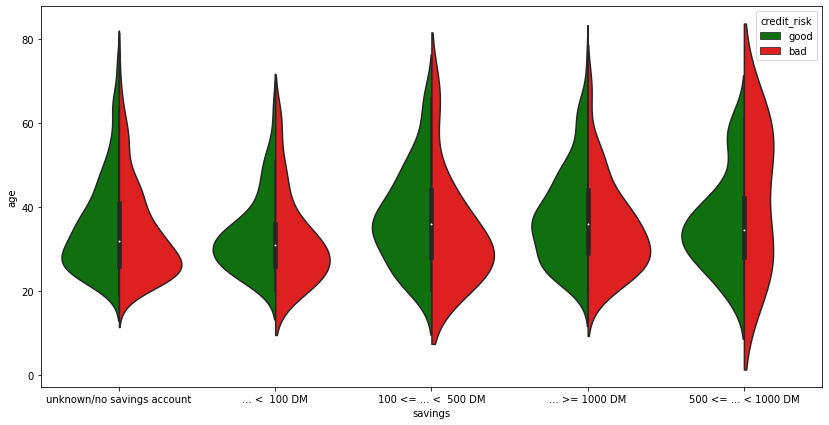

In [ ]:
# то что должно получиться

### Задание 5  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

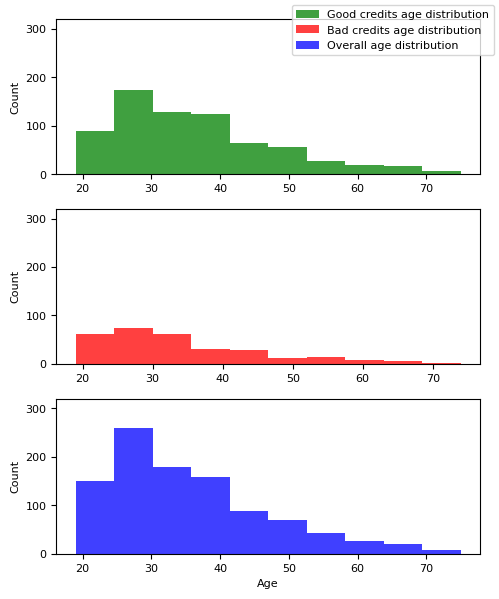

In [7]:
# ваш код здесь

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 6))

# Положительные
sns.histplot(df[df['credit_risk'] == 'good']['age'], bins=10, ax=ax1, color='green', edgecolor=None)
ax1.set_ylabel('Count', fontsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.set_xlabel(None)
ax1.set_ylim(0, 320)

# Отрицательные
sns.histplot(df[df['credit_risk'] == 'bad']['age'], bins=10, ax=ax2, color='red', edgecolor=None)
ax2.set_ylabel('Count', fontsize=8)
ax2.tick_params(axis='both', labelsize=8)
ax2.set_xlabel(None)
ax2.set_ylim(0, 320)

# Общее
sns.histplot(df['age'], bins=10, ax=ax3, color='blue', edgecolor=None)
ax3.set_ylabel('Count', fontsize=8)
ax3.tick_params(axis='both', labelsize=8)
ax3.set_ylim(0, 320)

plt.xlabel('Age', fontsize=8)
plt.tight_layout()

# Костылим легенду
fig.legend(
    ['Good credits age distribution', 
    'Bad credits age distribution', 
    'Overall age distribution'], 
    loc='upper right', fontsize=8)

plt.show()

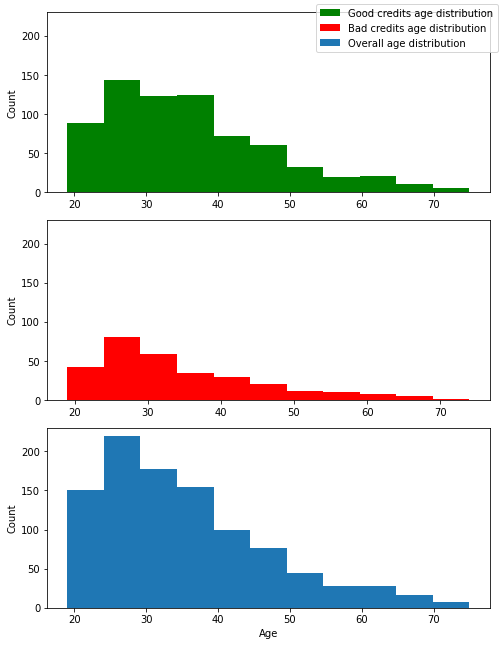

In [ ]:
# то что должно получиться

### Задание 6  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

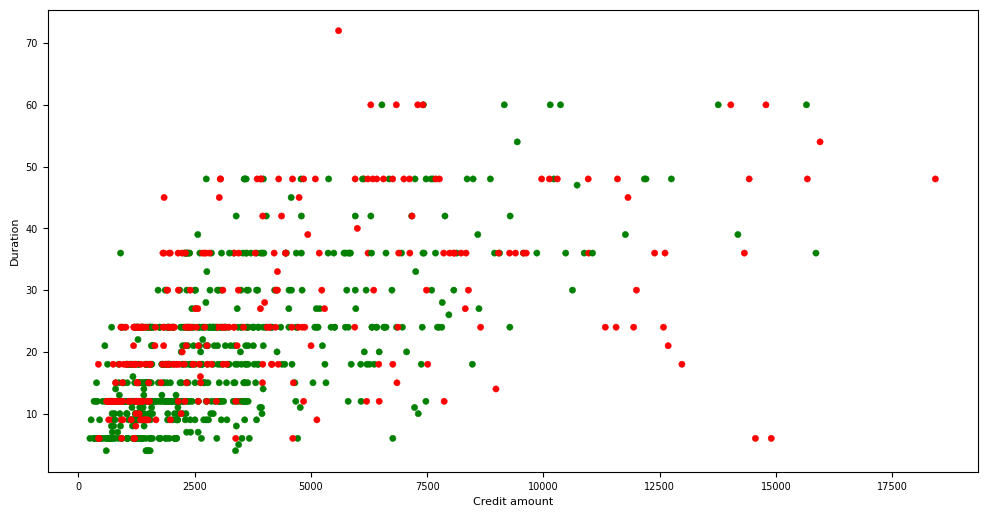

In [8]:
# ваш код здесь

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x='amount', 
    y='duration', 
    hue='credit_risk', 
    palette={'good': 'green', 'bad': 'red'}, 
    edgecolor=None,
    legend=False,
    s=20
)

# Настройки шрифта
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Credit amount', fontsize=8)
plt.ylabel('Duration', fontsize=8)

plt.show()

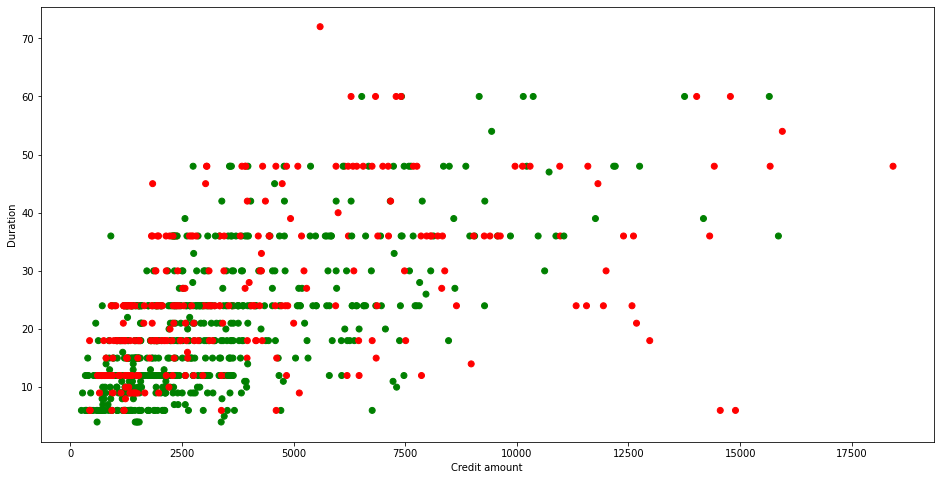

In [ ]:
# то что должно получиться

### Задание 7  (0.5 балла)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

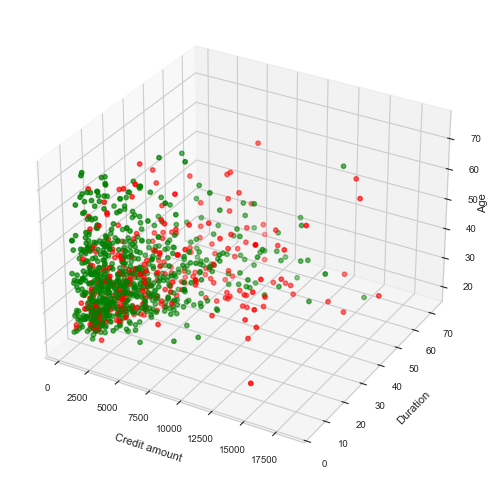

In [67]:
# ваш код здесь

sns.set_style("whitegrid") # seaborn тут нужен чисто для сетки

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d') # Не единственный, но самый простой способ сделать 3D

# Тут уже не засунешь 'hue'
colors = df['credit_risk'].map({'good': 'green', 'bad': 'red'})

ax.scatter(
    df['amount'], 
    df['duration'], 
    df['age'], 
    c=colors,
    edgecolor = None,
    s=10,
)

# Настройки шрифта
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# z-метки оси
new_zticks = [20, 30, 40, 50, 60, 70]
ax.set_zticks(new_zticks)
ax.set_zticklabels([str(tick) for tick in new_zticks], fontsize=7)

ax.set_xlabel('Credit amount', fontsize=8)
ax.set_ylabel('Duration', fontsize=8)
ax.set_zlabel('Age', fontsize=8, labelpad=-5, rotation=90) 
# Иначе без поворота и сдвига не видно, я просрал на это 2 часа, извините

plt.show()

In [55]:
# то что должно получиться

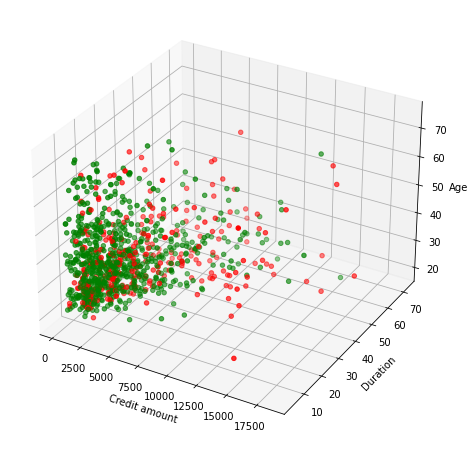

Что вы можете сказать о сравнении 3D- и 2D-визуализаций? Какие вы видите в них преимущества и недостатки?

Какие выводы с точки зрения бизнеса можно сделать из полученного графика?

**ВЫВОДЫ:** *Сравнивая 2D и 3D визуализацию, можно сказать, что 2D проще для человеческого восприятия, соответствено проще донести информацию. 3D же предоставляет больше свободы при визуализации сложных данных, также есть возможность создания интерактивных 3D графиков, что поднимает визуализацию данных на новый уровень. С точки зрения бизнеса: можно заключить, что в подавляющем большинстве кредитуется молодежь, причем на суммы в основном не превышающие 5000 на период в основном не превышающий 60 месяцев.*

## Раздел 2. Визуализации в датасете Netflix

В данном разделе вы продолжите практиковаться в визуализациях и поработаете с более сложными графиками и инструментами.

Все технические рекомендации остаются неизменными с прошлого раздела.

In [ ]:
NETFLIX_TITLES = 'https://github.com/evgpat/datasets/raw/refs/heads/main/netflix_titles.csv'

### Задание 1  (0.5 балла)

Прочитайте средствами pandas файл с данными Netflix. Посчитайте количество пропусков (NaN) в колонке `director`. Постройте столбчатую диаграмму, которая показывает 5 стран, в которых наибольшее количество фильмов содержат пропуски в столбце `director`.

Добавьте на диаграмму:

- Заголовок жирным шрифтом
- Подписи осей

In [ ]:
# ваш код здесь
...

### Задание 2 (0.5 балла)

Постройте pie chart (круговую диаграмму), показывающую 5 стран, в которых произвели больше всего фильмов.

Добавьте на диаграмму:

+ Заголовок (Тип шрифта: ``family = 'monospace'``, насыщенность: ``fontweight='bold'``)
+ Название стран (Тип шрифта: ``family = 'monospace'``)
+ Подписи значений (%) (Тип шрифта: ``family = 'monospace'``)
+ Выберите стиль для диаграммы pastel c помощью библиотеки ``seaborn``

```colors = sns.color_palette('pastel')[0:5]```

In [ ]:
# ваш код здесь
...

### Задание 3 (1 балл)

Постройте subplots, где на первом графике будет круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*, а на втором столбчатая диаграмма, показывающая 3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA.

*Если фильмов в каких-то рейтингах меньше 50, то их в график брать не нужно.*

Добавьте на диаграммы:

+ Заголовки (можно жирным)

Круговая диаграмма:
+ Подписи значений абсолютные

Столбчатая диаграммма:
+ Сделайте так, чтобы ось Y была справа
+ Добавьте подпись «Количество фильмов» к оси Y и уберите подпись к оси X
+ Оставьте видимыми только правую и нижнюю границы

In [ ]:
# ваш код здесь
...

### Задание 4 (1 балл)

Преобразуйте колонку `date_added` в datetime. Создайте новые столбцы month и year из преобразованного столбца. Постройте линейный график: сколько в среднем фильмов было снято в каждый из месяцев.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Маркеры на точках перегиба
+ Настройте ось X: ось начинается с 1 заканчивается 12, шаг 1

In [ ]:
# ваш код здесь
...

### Задание 5 (1 балл)

Постройте линейный график, в какие годы (столбец year, который вы создали в задании 4) сколько фильмов было снято.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Измените цвет линии графика и сделайте ее пунктиром
+ Решетку на фон

In [ ]:
# ваш код здесь
...

### Задание 6 (1 балл)

Будем работать со столбцом duration. Одни данные даны в минутах (для фильмов (Movie)), а другие в сезонах (для сериалов (TV shows)). Создайте два новых столбца min (для тех, у кого продолжительность в минутах) и season (для тех, у кого продолжительность в сезонах), в которых будут извлечены данные из столбца duration.

Постройте subplots, где на первом графике гистрограмма распределения продолжительности фильмов, а на втором – гистрограмма распределения продолжительности сериалов.

Добавьте на графики:

+ Заголовки жирным шрифтом
+ Подписи осей

In [ ]:
# ваш код здесь
...

### Задание 7 (0.5 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов (Movies). Визуально проинтерпретируйте его.

In [ ]:
# ваш код здесь
...

### Задание 8* (1 балл)

Постройте при помощи библиотеки plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [ ]:
# ваш код здесь
...